In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [3]:
# Load the datasets
aqua_csv = pd.read_csv('Resources/AQUASTAT Dissemination System.csv')
mie_csv = pd.read_csv('Resources/ua-mie-1.0.csv')
cow_country_codes = pd.read_csv('Resources/COW-country-codes.csv')
micnames = pd.read_csv('Resources/ua-micnames-1.0.csv')
WDI_df = pd.read_csv('Resources/WDI_World.csv')

In [4]:
code_to_country = pd.Series(cow_country_codes.StateNme.values, index=cow_country_codes.CCode).to_dict()

In [5]:
mie_csv['ccode1'] = mie_csv['ccode1'].map(code_to_country)
mie_csv['ccode2'] = mie_csv['ccode2'].map(code_to_country)
mie_csv.head()

,micnum,eventnum,ccode1,ccode2,stmon,stday,styear,endmon,endday,endyear,sidea1,action,hostlev,fatalmin1,fatalmax1,fatalmin2,fatalmax2,version
0,2,1,United States of America,United Kingdom,5,-9,1902,5,-9,1902,1,7,3,0,0,0,0,mie-1.0
1,3,1,Austria-Hungary,Yugoslavia,10,7,1913,10,7,1913,1,1,2,0,0,0,0,mie-1.0
2,4,2,Albania,United Kingdom,5,15,1946,5,15,1946,1,16,4,0,0,0,0,mie-1.0
3,4,3,United Kingdom,Albania,10,22,1946,10,22,1946,0,7,3,0,0,0,0,mie-1.0
4,4,4,United Kingdom,Albania,10,22,1946,10,22,1946,0,7,3,0,0,0,0,mie-1.0


In [6]:
mie_csv = mie_csv.rename(columns={'ccode1': 'Country'})
mie_csv = mie_csv.rename(columns={'ccode2': 'Target Country'})
aqua_csv = aqua_csv.rename(columns={'Area': 'Country'})
COW_Country_Codes = cow_country_codes.rename(columns={'StateNme':'Country'})
mie_csv = mie_csv.rename(columns={'styear': 'Year'})

In [7]:
conflict_name = pd.Series(micnames.micname.values, index= micnames.micnum).to_dict()

In [8]:
mie_csv['micnum'] = mie_csv['micnum'].map(conflict_name)
mie_csv.head()

,micnum,eventnum,Country,Target Country,stmon,stday,Year,endmon,endday,endyear,sidea1,action,hostlev,fatalmin1,fatalmax1,fatalmin2,fatalmax2,version
0,Alaska Boundary Dispute (1902),1,United States of America,United Kingdom,5,-9,1902,5,-9,1902,1,7,3,0,0,0,0,mie-1.0
1,Serbian and Austro-Hungarian Fighting over Alb...,1,Austria-Hungary,Yugoslavia,10,7,1913,10,7,1913,1,1,2,0,0,0,0,mie-1.0
2,British Attempts to Pass the Albanian Corfu Ch...,2,Albania,United Kingdom,5,15,1946,5,15,1946,1,16,4,0,0,0,0,mie-1.0
3,British Attempts to Pass the Albanian Corfu Ch...,3,United Kingdom,Albania,10,22,1946,10,22,1946,0,7,3,0,0,0,0,mie-1.0
4,British Attempts to Pass the Albanian Corfu Ch...,4,United Kingdom,Albania,10,22,1946,10,22,1946,0,7,3,0,0,0,0,mie-1.0


In [9]:
#Filter mie_csv by the years 1980-2015 and count total conflicts per year
filtered_mie_df = mie_csv[(mie_csv['Year'] >= 1980) & (mie_csv['Year'] <= 2015)]
year_counts = filtered_mie_df['Year'].value_counts().sort_index()
mie_per_year_df = pd.DataFrame({'Year': year_counts.index, 'Count': year_counts.values})
mie_per_year_df

,Year,Count
0,1980,223
1,1981,227
2,1982,227
3,1983,203
4,1984,258
5,1985,193
6,1986,180
7,1987,193
8,1988,61
9,1989,59


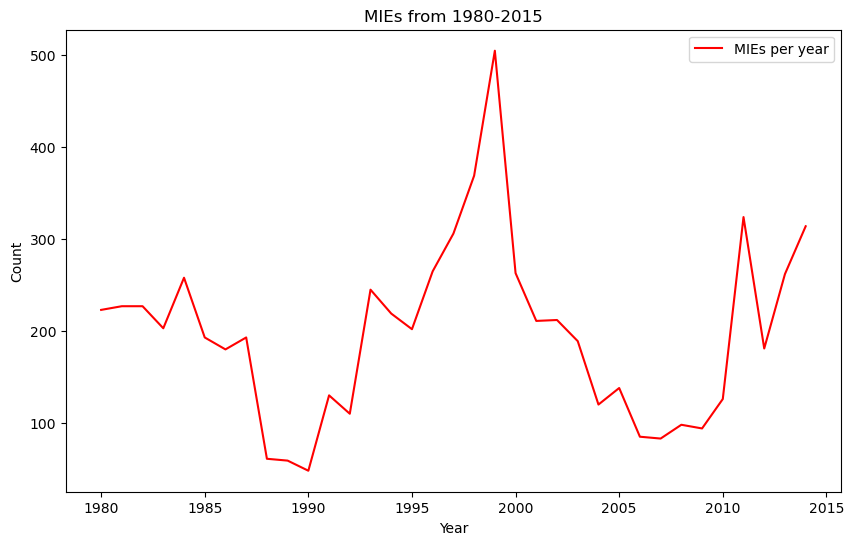

In [10]:
# Plot conflicts between 1980-2015
plt.figure(figsize=(10, 6))
sns.lineplot(data=mie_per_year_df, x='Year', y='Count', label='MIEs per year', color="red")
plt.title('MIEs from 1980-2015')
plt.xlabel('Year')
plt.ylabel('Count') 
plt.legend()
plt.show()

In [11]:
#Further filter by country and count total conflict per country between years 1980-2015
filtered_mie_df = mie_csv[(mie_csv['Year'] >= 1980) & (mie_csv['Year'] <= 2015)]
country_counts = filtered_mie_df['Country'].value_counts().sort_index()
mie_per_country_df = pd.DataFrame({'Country': country_counts.index, 'Count': country_counts.values})
mie_per_country_df

,Country,Count
0,Afghanistan,168
1,Albania,37
2,Algeria,2
3,Angola,20
4,Antigua & Barbuda,1
...,...,...
150,Yemen,6
151,Yemen People's Republic,2
152,Yugoslavia,171
153,Zambia,6


In [12]:
#Filter again by target country and count total conflict per country between years 1980-2015 to ensure the same result as above.
filtered_mie_df = mie_csv[(mie_csv['Year'] >= 1980) & (mie_csv['Year'] <= 2015)]
target_country_counts = filtered_mie_df['Target Country'].value_counts().sort_index()
mie_per_target_country_df = pd.DataFrame({'Target Country': country_counts.index, 'Count': country_counts.values})
mie_per_target_country_df

,Target Country,Count
0,Afghanistan,168
1,Albania,37
2,Algeria,2
3,Angola,20
4,Antigua & Barbuda,1
...,...,...
150,Yemen,6
151,Yemen People's Republic,2
152,Yugoslavia,171
153,Zambia,6


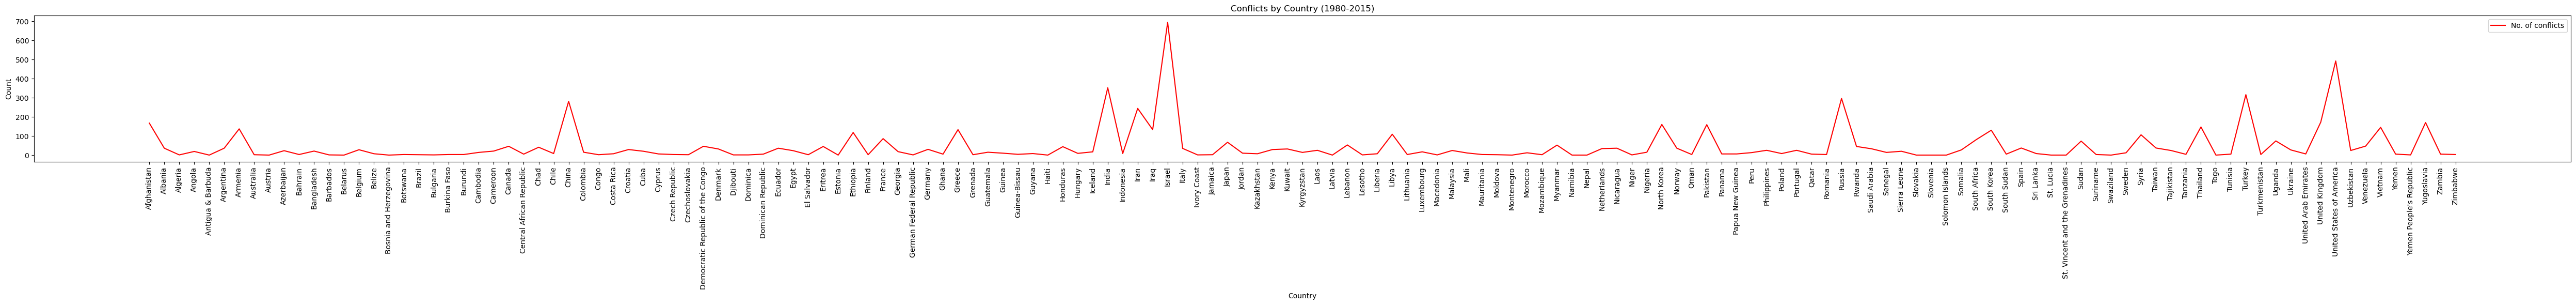

In [13]:
# Plot conflicts by country between 1980-2015
plt.figure(figsize=(50, 6))
sns.lineplot(data=mie_per_country_df, x='Country', y='Count', label='No. of conflicts', color="red")
plt.title('Conflicts by Country (1980-2015)')
plt.xlabel('Country')
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
# Filter water stress data to include only the specific variable
water_df = pd.DataFrame(aqua_csv)
keyword = 'SDG 6.4.2. Water Stress'
filtered_water = aqua_csv['Variable'].str.contains(keyword, na=False)
filtered_water_df = water_df[filtered_water]
filtered_water_df.head()

,VariableGroup,Subgroup,Variable,Country,Year,Value,Unit,Symbol,IsAggregate
28609,Water use,Pressure on water resources,SDG 6.4.2. Water Stress,Afghanistan,1981,49.69101,%,E,False
28610,Water use,Pressure on water resources,SDG 6.4.2. Water Stress,Afghanistan,1982,53.15823,%,E,False
28611,Water use,Pressure on water resources,SDG 6.4.2. Water Stress,Afghanistan,1983,56.62545,%,E,False
28612,Water use,Pressure on water resources,SDG 6.4.2. Water Stress,Afghanistan,1984,60.09267,%,E,False
28613,Water use,Pressure on water resources,SDG 6.4.2. Water Stress,Afghanistan,1985,63.55989,%,E,False


In [15]:
#Groupby year and value
overall_percentage_per_year = filtered_water_df.groupby('Year')['Value'].mean().reset_index()
print(overall_percentage_per_year)

    Year      Value
0   1981  57.192850
1   1982  59.129871
2   1983  62.086189
3   1984  64.124653
4   1985  61.485680
5   1986  62.858329
6   1987  46.081684
7   1988  47.134030
8   1989  48.748405
9   1990  47.181621
10  1991  46.741923
11  1992  50.126828
12  1993  60.287064
13  1994  59.184414
14  1995  58.233210
15  1996  59.448025
16  1997  60.913166
17  1998  62.181829
18  1999  63.756851
19  2000  57.600914
20  2001  57.602387
21  2002  57.641719
22  2003  58.144004
23  2004  59.985203
24  2005  61.400975
25  2006  61.219045
26  2007  61.089586
27  2008  60.754024
28  2009  60.928819
29  2010  61.006775
30  2011  61.330930
31  2012  61.656977
32  2013  61.945989
33  2014  62.189426
34  2015  62.645892
35  2016  63.531964
36  2017  65.308445
37  2018  65.640971
38  2019  65.618059
39  2020  65.425259
40  2021  65.330769


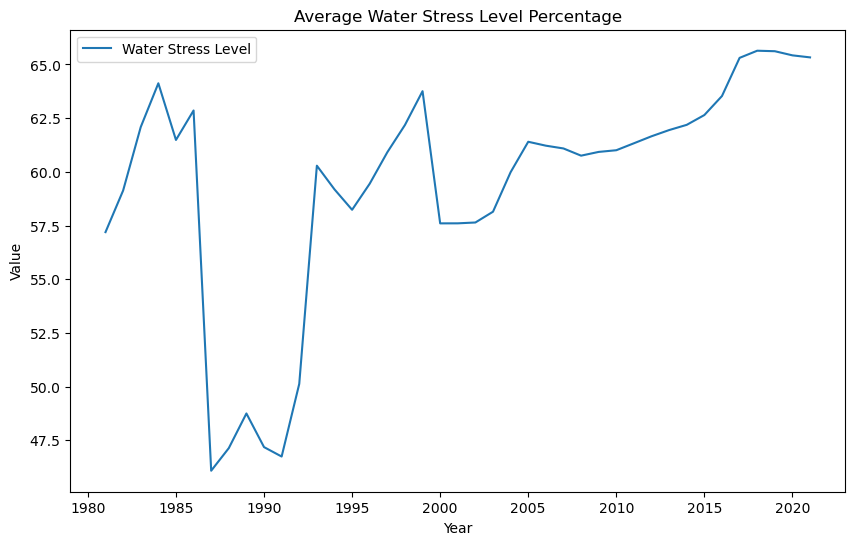

In [16]:
# Total Water Stress Level by year by average
plt.figure(figsize=(10, 6))
sns.lineplot(data=overall_percentage_per_year, x='Year', y='Value', label='Water Stress Level')
plt.title('Average Water Stress Level Percentage')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [68]:
total_value_per_year = filtered_water_df.groupby('Year')['Value'].sum().reset_index()
print(total_value_per_year)

    Year         Value
0   1981   3088.413899
1   1982   3252.142902
2   1983   3414.740393
3   1984   3590.980563
4   1985   3750.626476
5   1986   3897.216413
6   1987   4101.269832
7   1988   4242.062680
8   1989   4387.356432
9   1990   4812.525321
10  1991   5048.127703
11  1992   6015.219326
12  1993   7777.031245
13  1994   7989.895941
14  1995   8210.882544
15  1996   8501.067554
16  1997   8771.495860
17  1998   9016.365135
18  1999   9308.500182
19  2000  10195.361808
20  2001  10310.827281
21  2002  10490.792892
22  2003  10640.352761
23  2004  11037.277393
24  2005  11420.581346
25  2006  11570.399467
26  2007  11668.110933
27  2008  11786.280595
28  2009  11820.190836
29  2010  11896.321054
30  2011  11959.531257
31  2012  12269.738402
32  2013  12327.251789
33  2014  12375.695695
34  2015  12466.532545
35  2016  12642.860860
36  2017  12996.380484
37  2018  13062.553287
38  2019  13057.993804
39  2020  13019.626506
40  2021  13000.823016


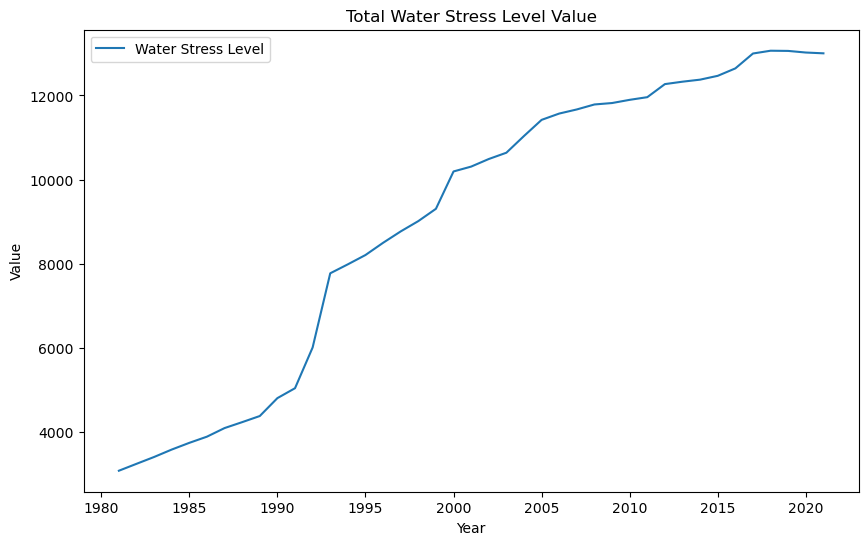

In [70]:
# Total Water Stress Level by year by sum
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_value_per_year, x='Year', y='Value', label='Water Stress Level')
plt.title('Total Water Stress Level Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [17]:
#Further filter water data by country and count total water stress per country between years 1980-2015
water_country_counts = filtered_water_df['Country'].value_counts().sort_index()
water_stress_per_country_df = pd.DataFrame({'Country': water_country_counts.index, 'Count': water_country_counts.values})
water_stress_per_country_df

,Country,Count
0,Afghanistan,41
1,Albania,32
2,Algeria,41
3,Angola,35
4,Antigua and Barbuda,32
...,...,...
194,Western Asia,22
195,World,22
196,Yemen,32
197,Zambia,30


In [24]:
overall_percentage_per_country_df = pd.DataFrame(filtered_water_df.groupby('Country')['Value'].mean().reset_index())
overall_percentage_per_country_df

,Country,Value
0,Afghanistan,57.586399
1,Albania,7.535325
2,Algeria,87.107524
3,Angola,1.707609
4,Antigua and Barbuda,7.626202
...,...,...
194,Western Asia,60.753636
195,World,18.019091
196,Yemen,162.519345
197,Zambia,2.891564


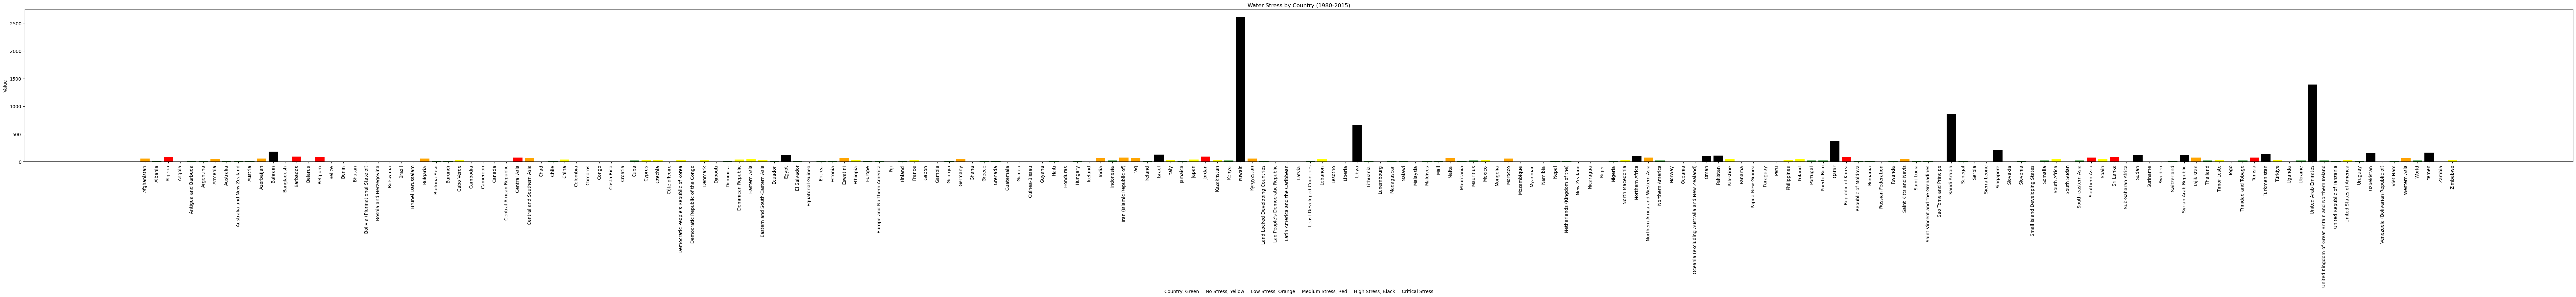

In [25]:
# Define conditions and corresponding colors
conditions = [
    (overall_percentage_per_country_df['Value'] <= 25),
    (overall_percentage_per_country_df['Value'] > 25) & (overall_percentage_per_country_df['Value'] <= 50),
    (overall_percentage_per_country_df['Value'] > 50) & (overall_percentage_per_country_df['Value'] <= 75),
    (overall_percentage_per_country_df['Value'] > 75) & (overall_percentage_per_country_df['Value'] <= 100)
]
colors = ['green', 'yellow', 'orange', 'red']

# Use np.select to assign colors based on conditions
overall_percentage_per_country_df['Color'] = np.select(conditions, colors, default='black')

# Plotting
fig, ax = plt.subplots(figsize=(100, 6))

# Plot bars manually
bars = ax.bar(overall_percentage_per_country_df['Country'], overall_percentage_per_country_df['Value'], color=overall_percentage_per_country_df['Color'])

# Add titles and labels
ax.set_title('Water Stress by Country (1980-2015)')
ax.set_xlabel('Country: Green = No Stress, Yellow = Low Stress, Orange = Medium Stress, Red = High Stress, Black = Critical Stress')
ax.set_ylabel('Value')
ax.tick_params(axis='x', labelrotation=90)

plt.show()

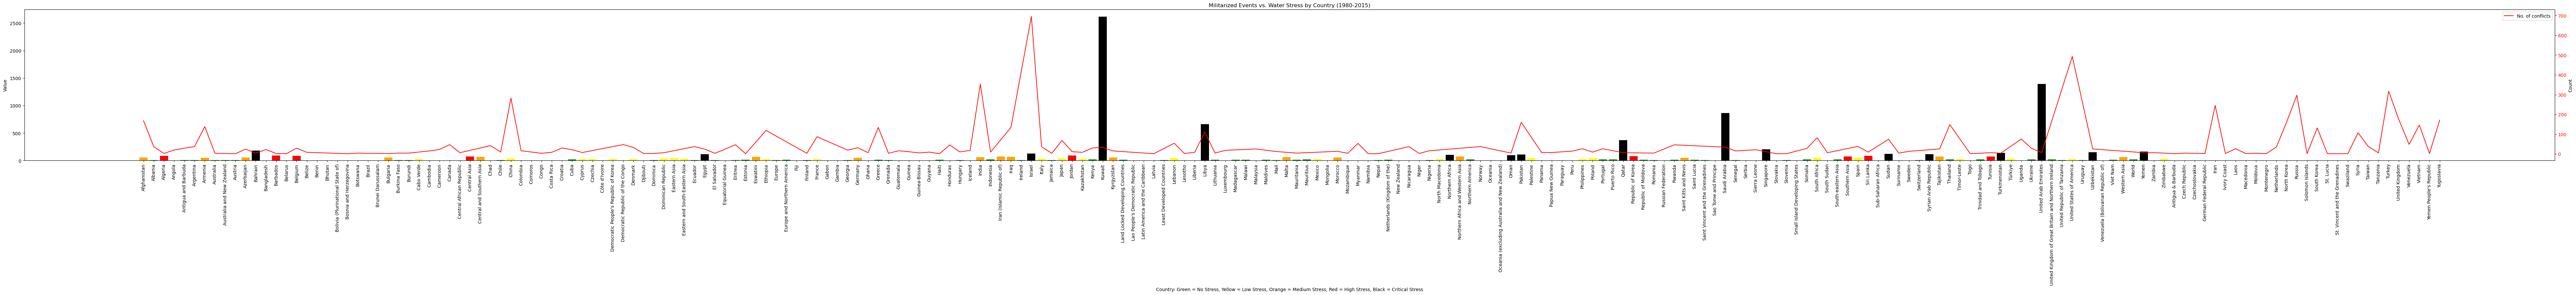

In [67]:
# Define conditions and corresponding colors
conditions = [
    (overall_percentage_per_country_df['Value'] <= 25),
    (overall_percentage_per_country_df['Value'] > 25) & (overall_percentage_per_country_df['Value'] <= 50),
    (overall_percentage_per_country_df['Value'] > 50) & (overall_percentage_per_country_df['Value'] <= 75),
    (overall_percentage_per_country_df['Value'] > 75) & (overall_percentage_per_country_df['Value'] <= 100)
]
colors = ['green', 'yellow', 'orange', 'red']

# Use np.select to assign colors based on conditions
overall_percentage_per_country_df['Color'] = np.select(conditions, colors, default='black')

# Plotting
fig, ax = plt.subplots(figsize=(100, 6))

# Plot bars manually
bars = ax.bar(overall_percentage_per_country_df['Country'], overall_percentage_per_country_df['Value'], color=overall_percentage_per_country_df['Color'])

# Add titles and labels
ax.set_title('Militarized Events vs. Water Stress by Country (1980-2015)')
ax.set_xlabel('Country: Green = No Stress, Yellow = Low Stress, Orange = Medium Stress, Red = High Stress, Black = Critical Stress')
ax.set_ylabel('Value')
ax.tick_params(axis='x', labelrotation=90)

ax2 = ax.twinx()

sns.lineplot(data=mie_per_country_df, x='Country', y='Count', label='No. of conflicts', color="red")
ax2.set_xlabel('Country')
ax2.set_ylabel('Count')
ax2.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='x', labelrotation=90)

plt.savefig('militarized_events_vs_water_stress_by_country.png_color_coded.png', bbox_inches='tight') 
plt.show()

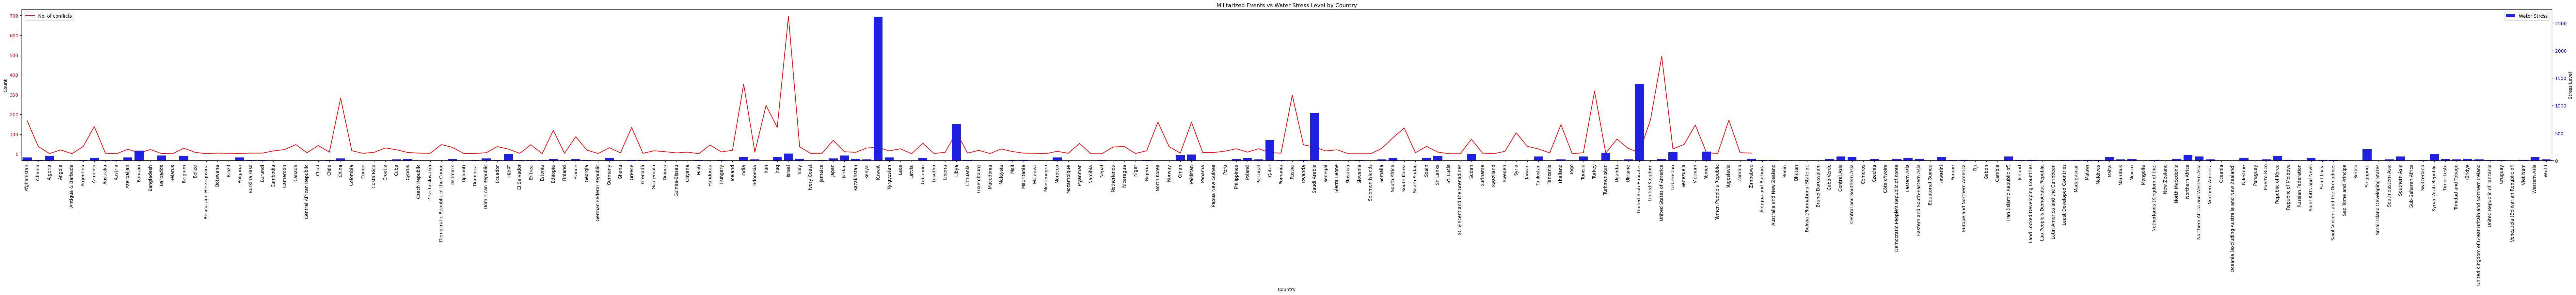

In [28]:
fig, ax1 = plt.subplots(figsize=(100, 6))
sns.lineplot(data=mie_per_country_df, x='Country', y='Count', label='No. of conflicts', color="red")
ax1.set_xlabel('Country')
ax1.set_ylabel('Count')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

sns.barplot(data=overall_percentage_per_country_df, x='Country', y='Value', label='Water Stress', color="blue")
plt.xlabel('Country')
ax2.set_ylabel('Stress Level')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_title('Militarized Events vs Water Stress Level by Country')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.tick_params(axis='x', labelrotation=90)

plt.savefig('militarized_events_vs_water_stress_by_country.png', bbox_inches='tight') 
plt.show()

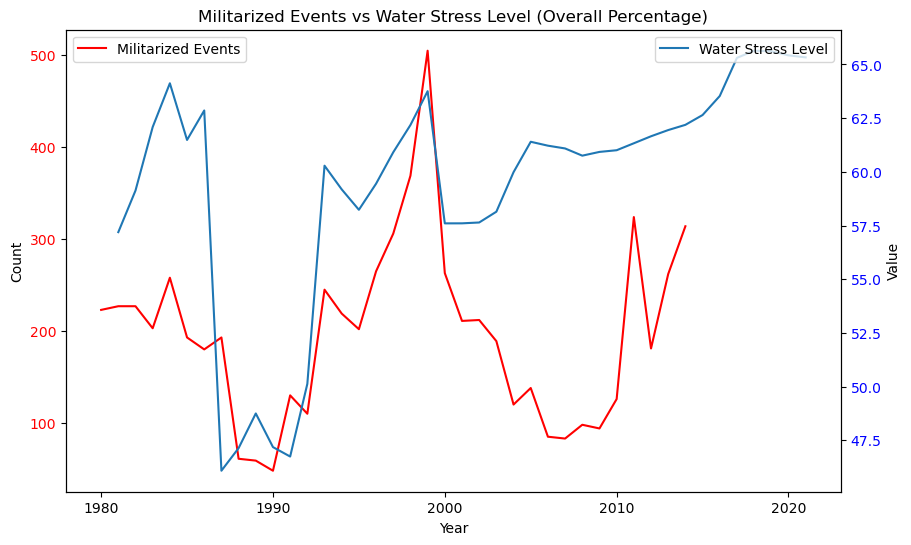

In [29]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=mie_per_year_df, x='Year', y='Count', label='Militarized Events', color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

sns.lineplot(data=overall_percentage_per_year, x='Year', y='Value', label='Water Stress Level')
plt.xlabel('Year')
ax2.set_ylabel('Value')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_title('Militarized Events vs Water Stress Level (Overall Percentage)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.savefig('militarized_events_vs_water_stress_by_year.png', bbox_inches='tight') 
plt.show()

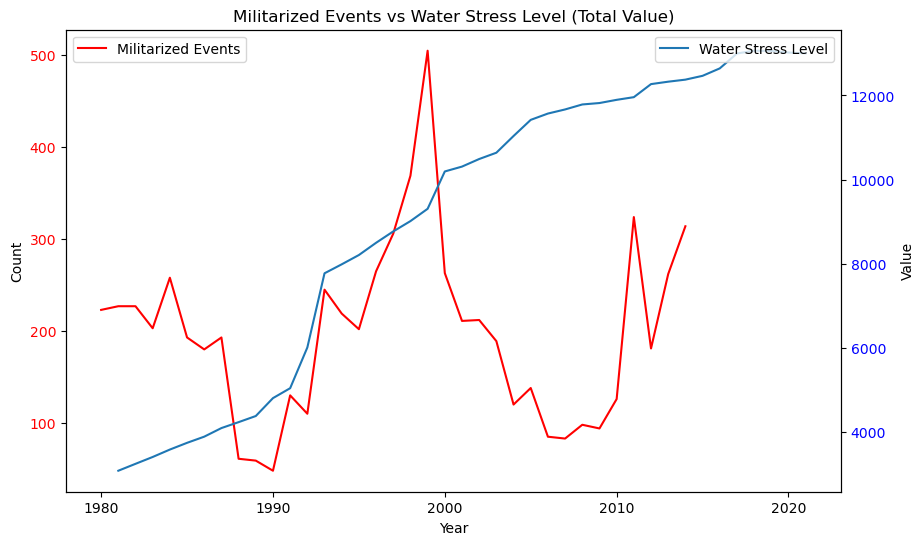

In [71]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=mie_per_year_df, x='Year', y='Count', label='Militarized Events', color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

sns.lineplot(data=total_value_per_year, x='Year', y='Value', label='Water Stress Level')
plt.xlabel('Year')
ax2.set_ylabel('Value')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_title('Militarized Events vs Water Stress Level (Total Value)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.savefig('militarized_events_vs_water_stress_by_year(total_value).png', bbox_inches='tight') 
plt.show()

In [30]:
WDI_df.head()

,Country Name,Country Code,Series Name,Series Code,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],...,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,World,WLD,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,75.6029242323162,75.6959573806835,76.8422110237843,76.5974772799729,76.6024728497366,76.0495676429734,...,51.8801297987834,51.8911235516106,52.966802416295,51.9946192893429,52.0244359748872,51.6598102561403,51.434801818807,51.2004449275282,50.8094847365935,47.1934417463395
1,World,WLD,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,..,7.0910700563557,7.16024597566327,7.00093699145194,6.87155631154786,6.6958143602211,...,3.17072353955477,3.34625038441823,3.51161492194638,3.62617466845568,3.83079042429474,3.97244074140658,4.00944164694051,4.14482511964403,4.12759739539601,4.21044204006536
2,World,WLD,"Annual freshwater withdrawals, total (% of int...",ER.H2O.FWTL.ZS,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,8.99785000063423,9.00101020530396
3,World,WLD,Births attended by skilled health staff (% of ...,SH.STA.BRTC.ZS,..,..,..,..,..,..,...,..,..,..,..,69.7497316936597,..,..,..,..,..
4,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,..,..,..,..,..,..,...,4.41709984339302,4.52826428575511,4.50380815254763,4.3914854392157,4.60492937876465,4.68950582813015,4.68534777048442,4.71956435074903,4.68223911436346,4.6014345417289


In [31]:
# Set the columns that should stay as identifiers
WDI_indexed_df = WDI_df.set_index(['Country Name', 'Country Code', 'Series Name', 'Series Code'])

# Stack the DataFrame to convert the columns into rows
WDI_stacked_df = WDI_indexed_df.stack().reset_index(name='Value')

# Rename columns
WDI_stacked_df.rename(columns={'level_4': 'Year'}, inplace=True)

# Extract the year from the 'Year' column
WDI_stacked_df['Year'] = WDI_stacked_df['Year'].str.extract(r'(\d{4})').astype(int)

# Display the reshaped DataFrame
WDI_stacked_df.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
0,World,WLD,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1980,75.6029242323162
1,World,WLD,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1981,75.6959573806835
2,World,WLD,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1982,76.8422110237843
3,World,WLD,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1983,76.5974772799729
4,World,WLD,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1984,76.6024728497366


In [32]:
# Filter to include only the specific variable
keyword = 'NY.GDP.MKTP.CD'
WDI_GDP = WDI_stacked_df['Series Code'].str.contains(keyword, case=False, na=False)
WDI_GDP_df = WDI_stacked_df[WDI_GDP]
WDI_GDP_df.head()

,Country Name,Country Code,Series Name,Series Code,Year,Value
504,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,1980,11419164161217.7
505,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,1981,11796482847017.7
506,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,1982,11648085880486.3
507,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,1983,11972210792643.6
508,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,1984,12445989345469.1


In [33]:
WDI_GDP_columns_to_drop = ['Country Name', 'Country Code', 'Series Name', 'Series Code']
WDI_GDP_existing_columns_to_drop = [col for col in WDI_GDP_columns_to_drop if col in WDI_GDP_df.columns]

if WDI_GDP_existing_columns_to_drop:
   WDI_GDP_df = WDI_GDP_df.drop(columns=WDI_GDP_existing_columns_to_drop)
else:
    print("No columns to drop.")

In [34]:
print(WDI_GDP_df.dtypes)

Year      int32
Value    object
dtype: object


In [35]:
WDI_GDP_df['Value'] = WDI_GDP_df['Value'].astype(float)
print(WDI_GDP_df.dtypes)

Year       int32
Value    float64
dtype: object


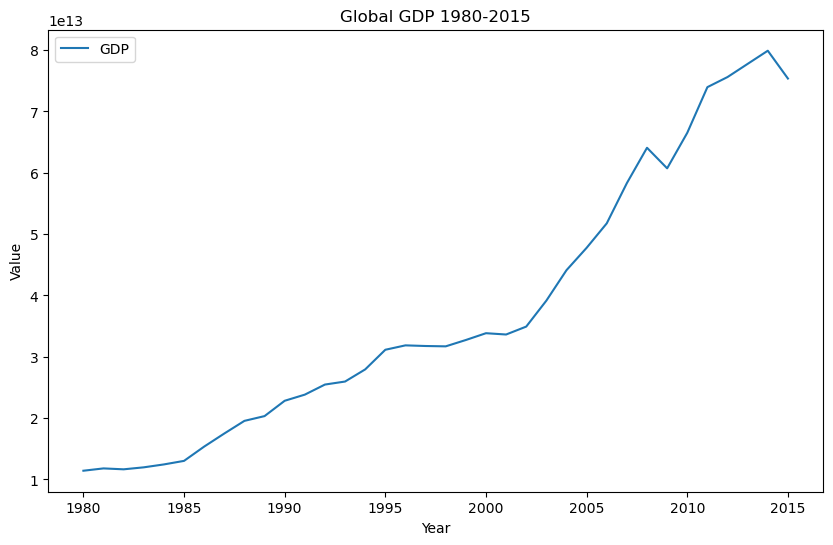

In [36]:
# Global GDP by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=WDI_GDP_df, x='Year', y='Value', label='GDP')
plt.title('Global GDP 1980-2015')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

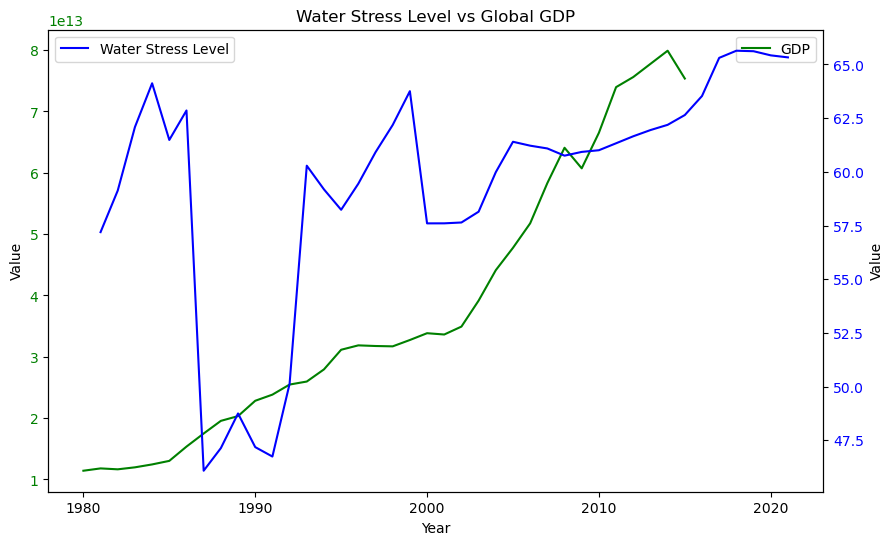

In [65]:
#Combined Water Stress and CO2 Chart
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Militarized Events
sns.lineplot(data=WDI_GDP_df, x='Year', y='Value', label='GDP', color='green')
ax1.set_xlabel('Year')
ax1.set_ylabel('Value')
ax1.tick_params(axis='y', labelcolor='green')

# Create twin axes for Water Stress Level
ax2 = ax1.twinx()
sns.lineplot(data=overall_percentage_per_year, x='Year', y='Value', label='Water Stress Level', color='blue', ax=ax2)
ax2.set_ylabel('Value')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title
ax1.set_title('Water Stress Level vs Global GDP')

plt.savefig('water_stress_GDP.png', bbox_inches='tight') 
plt.show()

In [38]:
# Filter to include only the specific variable
keyword = 'EN.ATM.CO2E.PC'
WDI_CO2 = WDI_stacked_df['Series Code'].str.contains(keyword, case=False, na=False)
WDI_CO2_df = WDI_stacked_df[WDI_CO2]
WDI_CO2_df

,Country Name,Country Code,Series Name,Series Code,Year,Value
144,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1980,..
145,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1981,..
146,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1982,..
147,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1983,..
148,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1984,..
149,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1985,..
150,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1986,..
151,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1987,..
152,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1988,..
153,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1989,..


In [39]:
WDI_CO2_columns_to_drop = ['Country Name', 'Country Code', 'Series Name', 'Series Code']
WDI_CO2_existing_columns_to_drop = [col for col in WDI_CO2_columns_to_drop if col in WDI_CO2_df.columns]

if WDI_CO2_existing_columns_to_drop:
   WDI_CO2_df = WDI_CO2_df.drop(columns=WDI_CO2_existing_columns_to_drop)
else:
    print("No columns to drop.")

In [40]:
print(WDI_CO2_df.dtypes)

Year      int32
Value    object
dtype: object


In [41]:
WDI_CO2_df['Value'] = pd.to_numeric(WDI_CO2_df['Value'], errors='coerce')
print(WDI_CO2_df.dtypes)

Year       int32
Value    float64
dtype: object


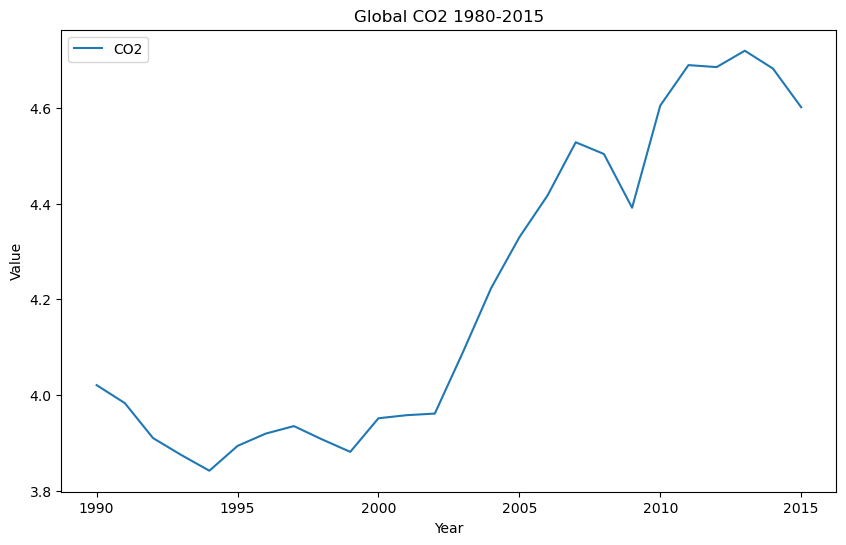

In [42]:
# Global CO2 by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=WDI_CO2_df, x='Year', y='Value', label='CO2')
plt.title('Global CO2 1980-2015')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

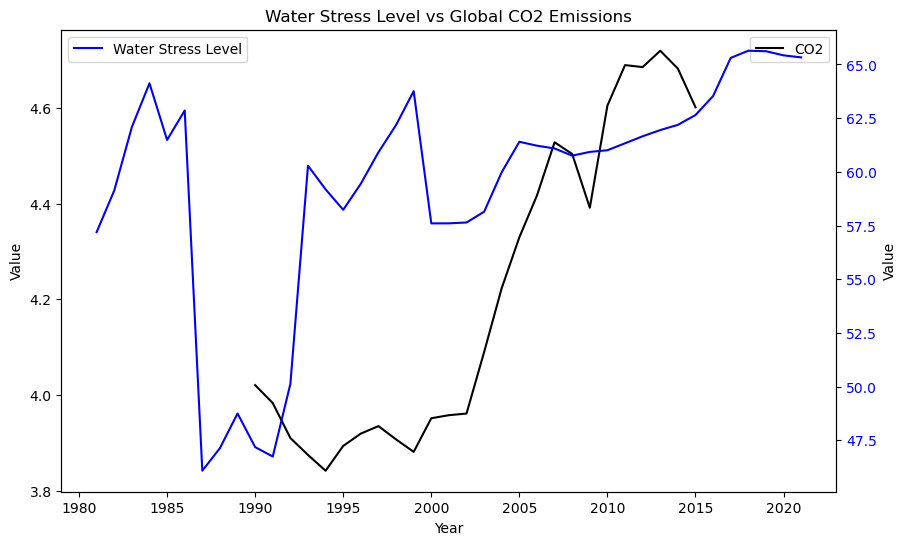

In [66]:
#Combined Water Stress and CO2 Chart
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Militarized Events
sns.lineplot(data=WDI_CO2_df, x='Year', y='Value', label='CO2', color='black')
ax1.set_xlabel('Year')
ax1.set_ylabel('Value')
ax1.tick_params(axis='y', labelcolor='black')

# Create twin axes for Water Stress Level
ax2 = ax1.twinx()
sns.lineplot(data=overall_percentage_per_year, x='Year', y='Value', label='Water Stress Level', color='blue', ax=ax2)
ax2.set_ylabel('Value')
ax2.tick_params(axis='y', labelcolor='blue')

# Add title
ax1.set_title('Water Stress Level vs Global CO2 Emissions')

plt.savefig('water_stress_CO2.png', bbox_inches='tight') 
plt.show()

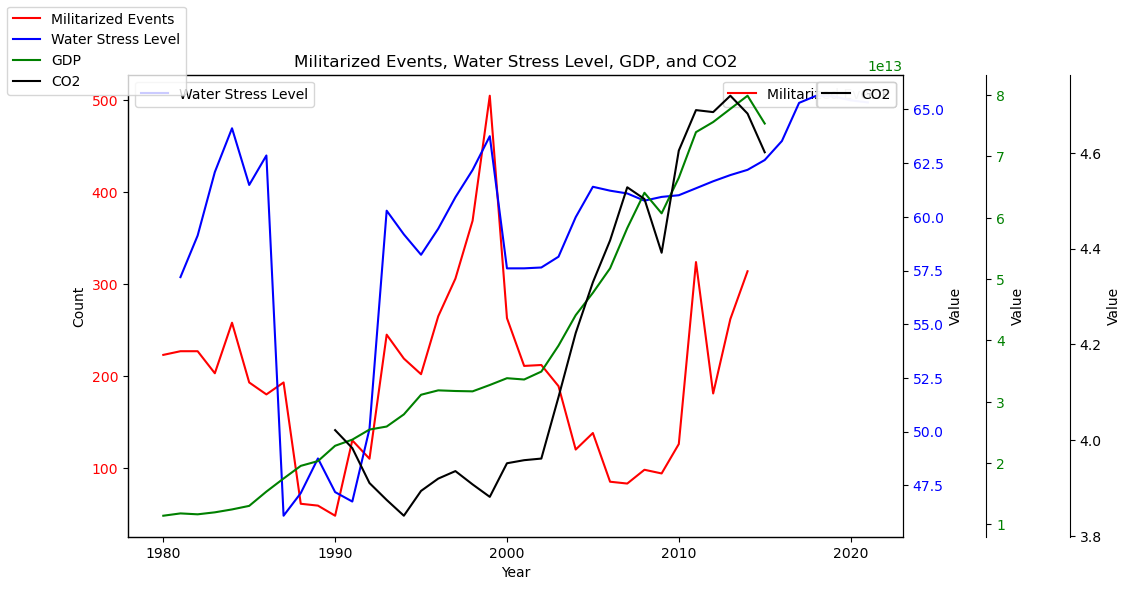

In [44]:
#Combined Chart
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Militarized Events
sns.lineplot(data=mie_per_year_df, x='Year', y='Count', label='Militarized Events', color='red', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.tick_params(axis='y', labelcolor='red')

# Create twin axes for Water Stress Level
ax2 = ax1.twinx()
sns.lineplot(data=overall_percentage_per_year, x='Year', y='Value', label='Water Stress Level', color='blue', ax=ax2)
ax2.set_ylabel('Value')
ax2.tick_params(axis='y', labelcolor='blue')

# Create another set of twin axes for GDP
ax3 = ax1.twinx()
# Adjust the position of the third set of axes to avoid overlap
ax3.spines['right'].set_position(('outward', 60))
sns.lineplot(data=WDI_GDP_df, x='Year', y='Value', label='GDP', color='green', ax=ax3)
ax3.set_ylabel('Value')
ax3.tick_params(axis='y', labelcolor='green')

# Create another set of twin axes for CO2
ax4 = ax1.twinx()
# Adjust the position of the fourth set of axes to avoid overlap
ax4.spines['right'].set_position(('outward', 120))
sns.lineplot(data=WDI_CO2_df, x='Year', y='Value', label='CO2', color='black', ax=ax4)
ax4.set_ylabel('Value')
ax4.tick_params(axis='y', labelcolor='black')

# Add title
ax1.set_title('Militarized Events, Water Stress Level, GDP, and CO2')

# Add legends
lines = [line for line in ax1.get_lines()] + [line for line in ax2.get_lines()] + [line for line in ax3.get_lines()] + [line for line in ax4.get_lines()]
labels = [line.get_label() for line in lines]
fig.legend(lines, labels, loc='upper left')

# Save and show plot
plt.savefig('MIEs_vs_water_stress_vs_GDP_vs_CO2_by_year.png', bbox_inches='tight') 
plt.show()

In [45]:
#Merge military event and aquastat csvs into a single DataFrame
merged_df = pd.merge(mie_csv, aqua_csv, on=['Country', 'Year'])
merged_df.head()

,micnum,eventnum,Country,Target Country,stmon,stday,Year,endmon,endday,endyear,...,fatalmin2,fatalmax2,version,VariableGroup,Subgroup,Variable,Value,Unit,Symbol,IsAggregate
0,Thai-Cambodian-Vietnamese Border Conflict and ...,60,Thailand,Vietnam,2,1,1982,5,21,1982,...,0,0,mie-1.0,Water use,Pressure on water resources,SDG 6.4.1. Industrial Water Use Efficiency,18.344039,US$/m3,E,False
1,Thai-Cambodian-Vietnamese Border Conflict and ...,60,Thailand,Vietnam,2,1,1982,5,21,1982,...,0,0,mie-1.0,Water use,Pressure on water resources,SDG 6.4.1. Services Water Use Efficiency,44.622745,US$/m3,E,False
2,Thai-Cambodian-Vietnamese Border Conflict and ...,61,Thailand,Vietnam,2,1,1982,2,1,1982,...,1,1,mie-1.0,Water use,Pressure on water resources,SDG 6.4.1. Industrial Water Use Efficiency,18.344039,US$/m3,E,False
3,Thai-Cambodian-Vietnamese Border Conflict and ...,61,Thailand,Vietnam,2,1,1982,2,1,1982,...,1,1,mie-1.0,Water use,Pressure on water resources,SDG 6.4.1. Services Water Use Efficiency,44.622745,US$/m3,E,False
4,Thai-Cambodian-Vietnamese Border Conflict and ...,64,Thailand,Vietnam,1,-9,1983,1,-9,1983,...,0,0,mie-1.0,Water use,Pressure on water resources,SDG 6.4.1. Industrial Water Use Efficiency,19.513973,US$/m3,E,False


In [46]:
merged_df.to_csv('merged_df.csv')

In [47]:
columns_to_drop = ['sidea1', 'action', 'stmon', 'stday', 'endmon', 'endday', 'endyear', 'version', 'VariableGroup', 'Subgroup', 'fatalmin1', 'fatalmin2', 'IsAggregate', 'Symbol']
existing_columns_to_drop = [col for col in columns_to_drop if col in merged_df.columns]

if existing_columns_to_drop:
   merged_df = merged_df.drop(columns=existing_columns_to_drop)
else:
    print("No columns to drop.")

In [48]:
merged_df.head()

,micnum,eventnum,Country,Target Country,Year,hostlev,fatalmax1,fatalmax2,Variable,Value,Unit
0,Thai-Cambodian-Vietnamese Border Conflict and ...,60,Thailand,Vietnam,1982,4,0,0,SDG 6.4.1. Industrial Water Use Efficiency,18.344039,US$/m3
1,Thai-Cambodian-Vietnamese Border Conflict and ...,60,Thailand,Vietnam,1982,4,0,0,SDG 6.4.1. Services Water Use Efficiency,44.622745,US$/m3
2,Thai-Cambodian-Vietnamese Border Conflict and ...,61,Thailand,Vietnam,1982,4,0,1,SDG 6.4.1. Industrial Water Use Efficiency,18.344039,US$/m3
3,Thai-Cambodian-Vietnamese Border Conflict and ...,61,Thailand,Vietnam,1982,4,0,1,SDG 6.4.1. Services Water Use Efficiency,44.622745,US$/m3
4,Thai-Cambodian-Vietnamese Border Conflict and ...,64,Thailand,Vietnam,1983,4,0,0,SDG 6.4.1. Industrial Water Use Efficiency,19.513973,US$/m3


In [49]:
print(merged_df)

                                                  micnum  eventnum   Country  \
0      Thai-Cambodian-Vietnamese Border Conflict and ...        60  Thailand   
1      Thai-Cambodian-Vietnamese Border Conflict and ...        60  Thailand   
2      Thai-Cambodian-Vietnamese Border Conflict and ...        61  Thailand   
3      Thai-Cambodian-Vietnamese Border Conflict and ...        61  Thailand   
4      Thai-Cambodian-Vietnamese Border Conflict and ...        64  Thailand   
...                                                  ...       ...       ...   
21683                Preah Vihear Temple Conflict (2011)        22  Thailand   
21684                Preah Vihear Temple Conflict (2011)        22  Thailand   
21685                Preah Vihear Temple Conflict (2011)        22  Thailand   
21686                Preah Vihear Temple Conflict (2011)        22  Thailand   
21687                Preah Vihear Temple Conflict (2011)        22  Thailand   

      Target Country  Year  hostlev  fa

In [50]:
# Filter water stress data to include only the specific variable
keyword = 'Water Stress'
filtered_merged_df = merged_df[merged_df['Variable'].str.contains(keyword, na=False)]
filtered_merged_df.head()

,micnum,eventnum,Country,Target Country,Year,hostlev,fatalmax1,fatalmax2,Variable,Value,Unit
79,The War over Angola of 1975–1976,132,Angola,South Africa,1987,4,0,0,SDG 6.4.2. Water Stress,1.27321,%
82,NaN,47,Afghanistan,Pakistan,1981,3,0,0,SDG 6.4.2. Water Stress,49.69101,%
83,NaN,48,Afghanistan,Pakistan,1981,4,0,0,SDG 6.4.2. Water Stress,49.69101,%
84,NaN,49,Afghanistan,Pakistan,1981,3,0,0,SDG 6.4.2. Water Stress,49.69101,%
85,NaN,50,Afghanistan,Pakistan,1981,3,0,0,SDG 6.4.2. Water Stress,49.69101,%


In [51]:
# temp_df = filtered_merged_df.groupby('Value').apply(lambda x: x.sort_values('Year'))
# temp_df["Value"].sum()
# filtered_merged_df = pd.DataFrame(data)
total_value_per_year = filtered_merged_df.groupby('Year')['Value'].sum().reset_index()
print(total_value_per_year)

    Year         Value
0   1981  20280.552706
1   1982   4732.241872
2   1983   8243.634390
3   1984   8564.155847
4   1985   7020.791950
5   1986  11173.041084
6   1987   4310.766901
7   1988    481.619125
8   1989   1496.425424
9   1990   2895.032961
10  1991   4492.495518
11  1992   2828.150032
12  1993  13384.567186
13  1994  19068.054335
14  1995  12851.227518
15  1996  20966.246113
16  1997  26504.261005
17  1998  12561.895868
18  1999  17599.943313
19  2000   6852.621465
20  2001  10923.654496
21  2002  11332.151429
22  2003  15493.251151
23  2004   4964.032688
24  2005   7439.843981
25  2006   3839.077778
26  2007   3385.996667
27  2008   3700.277712
28  2009   3915.569801
29  2010   5121.473139
30  2011  19261.236364
31  2012   8434.125253
32  2013  12230.464669
33  2014  10810.588177


In [52]:
conflicts_per_year_df = pd.DataFrame(filtered_merged_df["Year"].value_counts())
conflicts_per_year_df

,count
Year,
1999,356
2011,244
1997,215
1998,209
2014,203
1996,184
2013,180
2002,157
2001,148


In [53]:
# Encode 'Country' to numeric values (I didn't want to mess with your code above, Jason, to go back to COW codes)
filtered_merged_df.loc[:, 'Country_encoded'] = pd.factorize(filtered_merged_df['Country'])[0]
print(filtered_merged_df)

                                    micnum  eventnum      Country  \
79        The War over Angola of 1975–1976       132       Angola   
82                                     NaN        47  Afghanistan   
83                                     NaN        48  Afghanistan   
84                                     NaN        49  Afghanistan   
85                                     NaN        50  Afghanistan   
...                                    ...       ...          ...   
21663  Preah Vihear Temple Conflict (2011)        18     Thailand   
21669  Preah Vihear Temple Conflict (2011)        19     Cambodia   
21675  Preah Vihear Temple Conflict (2011)        20     Cambodia   
21681  Preah Vihear Temple Conflict (2011)        21     Thailand   
21687  Preah Vihear Temple Conflict (2011)        22     Thailand   

      Target Country  Year  hostlev  fatalmax1  fatalmax2  \
79      South Africa  1987        4          0          0   
82          Pakistan  1981        3          0   

C:\Users\matth\AppData\Local\Temp\ipykernel_18256\2309374192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_df.loc[:, 'Country_encoded'] = pd.factorize(filtered_merged_df['Country'])[0]


In [54]:
# Calculate correlation between encoded 'Country' and 'Value'
correlation = filtered_merged_df[['Country_encoded', 'Value']].corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                 Country_encoded     Value
Country_encoded         1.000000 -0.014013
Value                  -0.014013  1.000000


In [55]:
# Specific correlation value
correlation_value = correlation.loc['Country_encoded', 'Value']
print(f"Correlation between 'Country_encoded' and 'Value': {correlation_value}")

Correlation between 'Country_encoded' and 'Value': -0.014012962261841103


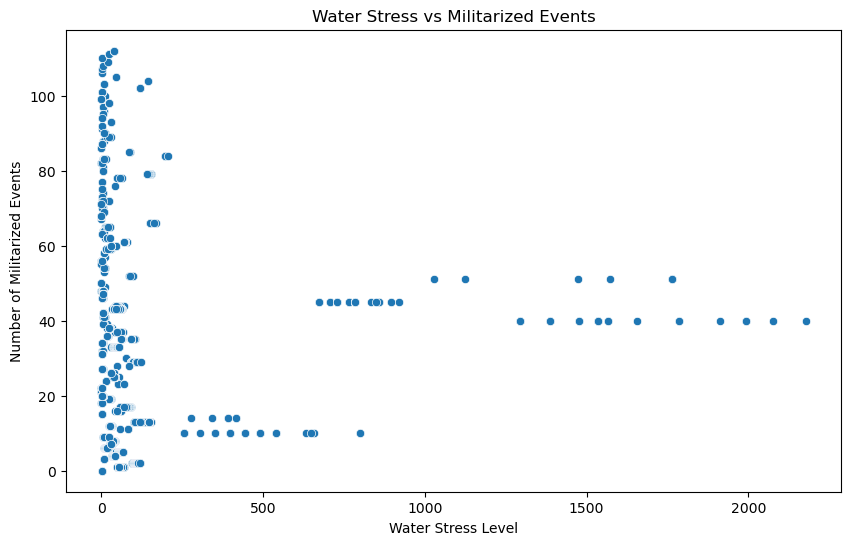

In [56]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_merged_df, x='Value', y='Country_encoded')
plt.title('Water Stress vs Militarized Events')
plt.xlabel('Water Stress Level')
plt.ylabel('Number of Militarized Events')
plt.show()

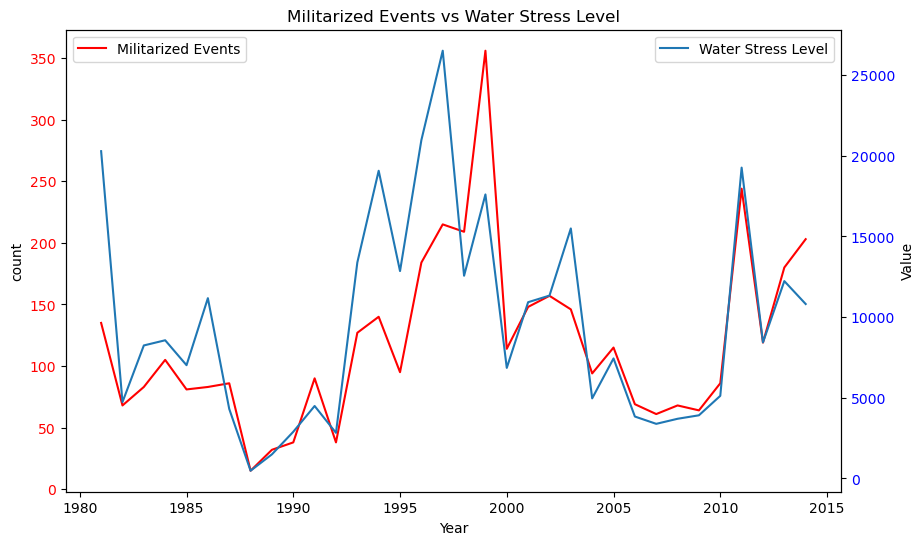

In [57]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.lineplot(data=conflicts_per_year_df, x='Year', y='count', label='Militarized Events', color='red')
ax1.set_xlabel('Year')
ax1.set_ylabel('count')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

sns.lineplot(data=total_value_per_year, x='Year', y='Value', label='Water Stress Level')
plt.xlabel('Year')
ax2.set_ylabel('Value')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.set_title('Militarized Events vs Water Stress Level')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

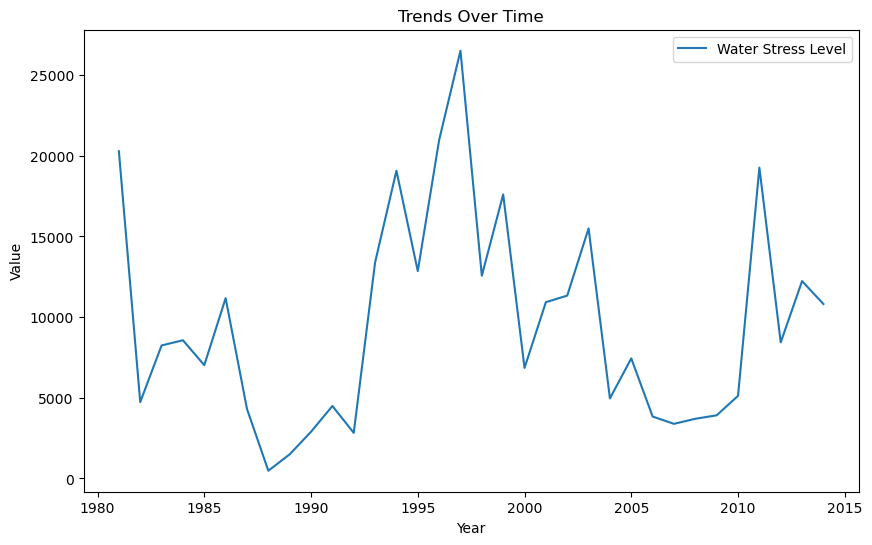

In [58]:
# Additional visualizations (e.g., trend over time)
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_value_per_year, x='Year', y='Value', label='Water Stress Level')
plt.title('Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

In [59]:
all_variables_df = merged_df
all_variables_df.head()

,micnum,eventnum,Country,Target Country,Year,hostlev,fatalmax1,fatalmax2,Variable,Value,Unit
0,Thai-Cambodian-Vietnamese Border Conflict and ...,60,Thailand,Vietnam,1982,4,0,0,SDG 6.4.1. Industrial Water Use Efficiency,18.344039,US$/m3
1,Thai-Cambodian-Vietnamese Border Conflict and ...,60,Thailand,Vietnam,1982,4,0,0,SDG 6.4.1. Services Water Use Efficiency,44.622745,US$/m3
2,Thai-Cambodian-Vietnamese Border Conflict and ...,61,Thailand,Vietnam,1982,4,0,1,SDG 6.4.1. Industrial Water Use Efficiency,18.344039,US$/m3
3,Thai-Cambodian-Vietnamese Border Conflict and ...,61,Thailand,Vietnam,1982,4,0,1,SDG 6.4.1. Services Water Use Efficiency,44.622745,US$/m3
4,Thai-Cambodian-Vietnamese Border Conflict and ...,64,Thailand,Vietnam,1983,4,0,0,SDG 6.4.1. Industrial Water Use Efficiency,19.513973,US$/m3


In [60]:
# Encode 'Country' to numeric values
merged_df.loc[:, 'Country_encoded'] = pd.factorize(merged_df['Country'])[0]
print(merged_df)

                                                  micnum  eventnum   Country  \
0      Thai-Cambodian-Vietnamese Border Conflict and ...        60  Thailand   
1      Thai-Cambodian-Vietnamese Border Conflict and ...        60  Thailand   
2      Thai-Cambodian-Vietnamese Border Conflict and ...        61  Thailand   
3      Thai-Cambodian-Vietnamese Border Conflict and ...        61  Thailand   
4      Thai-Cambodian-Vietnamese Border Conflict and ...        64  Thailand   
...                                                  ...       ...       ...   
21683                Preah Vihear Temple Conflict (2011)        22  Thailand   
21684                Preah Vihear Temple Conflict (2011)        22  Thailand   
21685                Preah Vihear Temple Conflict (2011)        22  Thailand   
21686                Preah Vihear Temple Conflict (2011)        22  Thailand   
21687                Preah Vihear Temple Conflict (2011)        22  Thailand   

      Target Country  Year  hostlev  fa

In [61]:
# Calculate correlation between encoded 'Country' and 'Value'
correlation = merged_df[['Country_encoded', 'Value']].corr()
print("Correlation Matrix:")
print(correlation)

Correlation Matrix:
                 Country_encoded     Value
Country_encoded         1.000000  0.004196
Value                   0.004196  1.000000


In [62]:
# Specific correlation value
correlation_value = correlation.loc['Country_encoded', 'Value']
print(f"Correlation between 'Country_encoded' and 'Value': {correlation_value}")

Correlation between 'Country_encoded' and 'Value': 0.00419600785800224


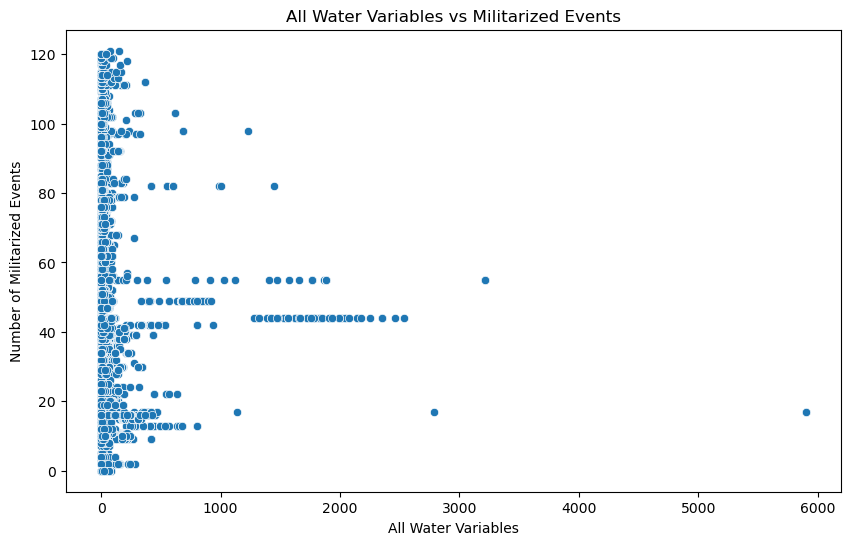

In [63]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Value', y='Country_encoded')
plt.title('All Water Variables vs Militarized Events')
plt.xlabel('All Water Variables')
plt.ylabel('Number of Militarized Events')
plt.show()

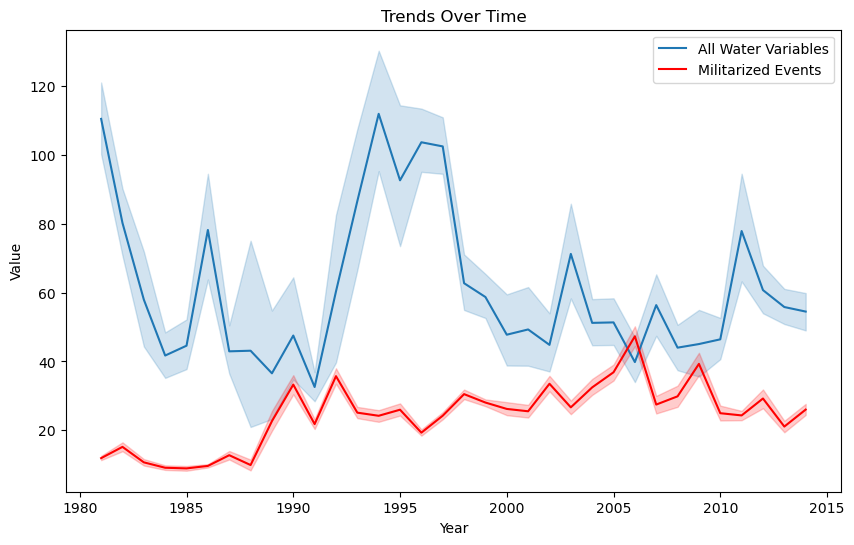

In [64]:
# Additional visualizations (e.g., trend over time)
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x='Year', y='Value', label='All Water Variables')
sns.lineplot(data=merged_df, x='Year', y='Country_encoded', label='Militarized Events', color='red')
plt.title('Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()